In [196]:
import pandas as pd

print("Pandas version:", pd.__version__)

Pandas version: 2.3.2


# Module 1 — What kind of data does pandas handle?

In this module, I learned that pandas works mainly with two objects:
- **Series** → one-dimensional labeled array (like a single column).
- **DataFrame** → two-dimensional table with labeled rows and columns.

The example creates a small DataFrame with Titanic passengers,
shows how to select a single column (a Series), and demonstrates
basic operations like `.max()` and `.describe()`.


In [197]:
# Create a small DataFrame (like in the tutorial)
df = pd.DataFrame({
    "Name": [
        "Braund, Mr. Owen Harris",
        "Allen, Mr. William Henry",
        "Bonnell, Miss. Elizabeth"
    ],
    "Age": [22, 35, 58],
    "Sex": ["male", "male", "female"]
})

# Show the DataFrame
df


,Name,Age,Sex
0,"Braund, Mr. Owen Harris",22,male
1,"Allen, Mr. William Henry",35,male
2,"Bonnell, Miss. Elizabeth",58,female


In [198]:
# Select just the "Age" column (this is a Series)
df["Age"]

0    22
1    35
2    58
Name: Age, dtype: int64

In [199]:
# Max age from the Age column
df["Age"].max()
# Describe the whole DataFrame
df.describe(include="all")

,Name,Age,Sex
count,3,3.000000,3
unique,3,NaN,2
top,"Braund, Mr. Owen Harris",NaN,male
freq,1,NaN,2
mean,NaN,38.333333,NaN
std,NaN,18.230012,NaN
min,NaN,22.000000,NaN
25%,NaN,28.500000,NaN
50%,NaN,35.000000,NaN
75%,NaN,46.500000,NaN


# Module 2 — Reading and writing data

In this part I worked with the Titanic dataset.  
I used `pd.read_csv()` to pull it in, checked out the shape and info to see what’s inside,  
and then saved it back out with `.to_csv()`.  

Pretty much just learning how to bring data in and send it back out.


In [200]:
import pandas as pd

# Read the Titanic dataset straight from GitHub
titanic = pd.read_csv("https://github.com/pandas-dev/pandas/raw/main/doc/data/titanic.csv")

# Show the first 5 rows so I know it loaded
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [201]:
# Check how many rows/columns it has
titanic.shape

(891, 12)

In [202]:
# See info about each column (data types, missing values, etc.)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [203]:
import os

# Make a 'data' folder
os.makedirs("data", exist_ok=True)

# Save Titanic data into that folder
titanic.to_csv("data/titanic_out.csv", index=False)

print("Saved Titanic data to data/titanic_out.csv")

Saved Titanic data to data/titanic_out.csv


# Module 3 — Selecting a subset of a DataFrame

Here I’m learning different ways to grab specific rows and columns.  
I can pick out just one column, multiple columns, rows by index,  
or even filter rows by a condition. Basically, this is where pandas  
starts feeling powerful because I don’t have to look at the whole table.


In [204]:
# Grab just the "Age" column (this returns a Series)
titanic["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [205]:
# Grab two columns together (this returns a DataFrame)
titanic[["Age", "Sex"]]

,Age,Sex
0,22.0,male
1,38.0,female
2,26.0,female
3,35.0,female
4,35.0,male
...,...,...
886,27.0,male
887,19.0,female
888,NaN,female
889,26.0,male


In [206]:
# Grab the first 5 rows
titanic.iloc[0:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [207]:
# Grab specific rows by label (row indices)
titanic.loc[0:5, ["Name", "Age", "Sex"]]

,Name,Age,Sex
0,"Braund, Mr. Owen Harris",22.0,male
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,female
2,"Heikkinen, Miss Laina",26.0,female
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,female
4,"Allen, Mr. William Henry",35.0,male
5,"Moran, Mr. James",NaN,male


In [208]:
# Filter: show passengers older than 35
titanic[titanic["Age"] > 35]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
865,866,1,2,"Bystrom, Mrs. (Karolina)",female,42.0,0,0,236852,13.0000,NaN,S
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
873,874,0,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C


In [209]:
# Filter: show passengers in 2nd class
titanic[titanic["Pclass"] == 2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0000,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
...,...,...,...,...,...,...,...,...,...,...,...,...
866,867,1,2,"Duran y More, Miss Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S


In [210]:
# Filter: combine conditions (older than 35 AND 1st class)
titanic[(titanic["Age"] > 35) & (titanic["Pclass"] == 1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
35,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S


# Module 4 — Creating plots

Now I’m checking out how easy it is to plot stuff right from pandas.  
It uses matplotlib under the hood, but I don’t have to import anything extra.  
I can do line charts, histograms, and more with just `.plot()`.  


<Axes: title={'center': 'Age distribution'}, ylabel='Frequency'>

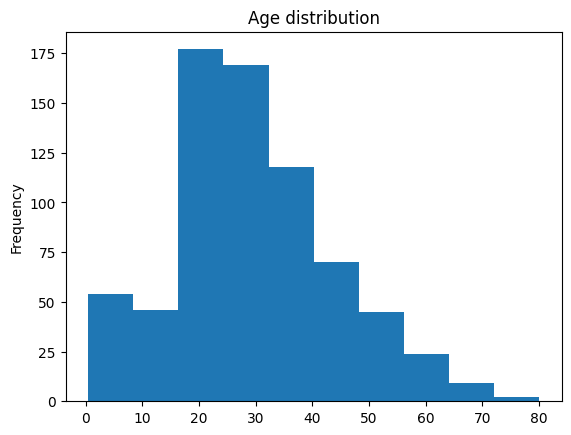

In [211]:
# Plot a histogram of passenger ages
titanic["Age"].plot(kind="hist", title="Age distribution")


<Axes: title={'center': 'Passenger Ages'}>

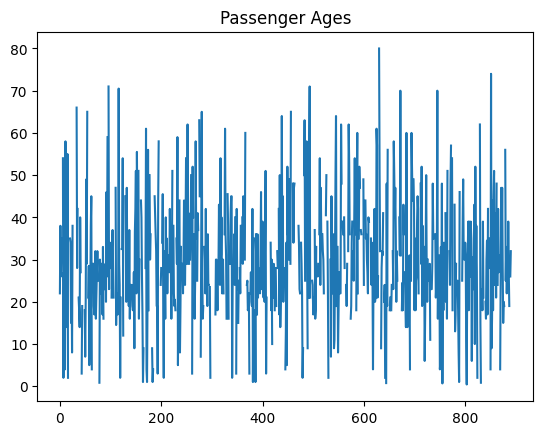

In [212]:
# Plot ages as a simple line (not very useful but shows line plot)
titanic["Age"].plot(kind="line", title="Passenger Ages")

<Axes: title={'center': 'Age vs Fare'}, xlabel='Age', ylabel='Fare'>

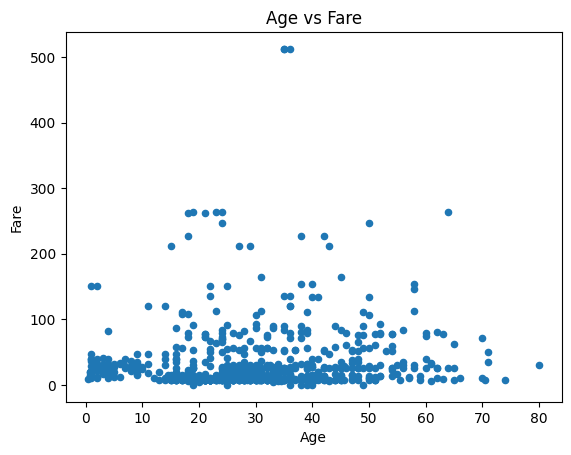

In [213]:
# Scatter plot between Age and Fare
titanic.plot(x="Age", y="Fare", kind="scatter", title="Age vs Fare")